In [11]:
import glob
import json

import numpy as np
from matplotlib import pyplot as plt

## All benchmarks, all hyperparameters are learned

branin2


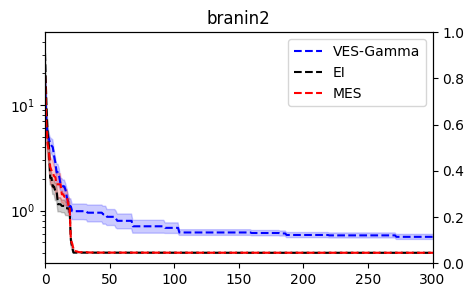

hartmann6


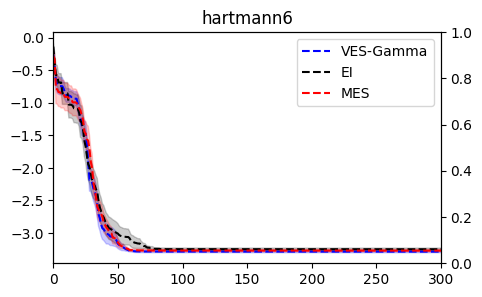

rover


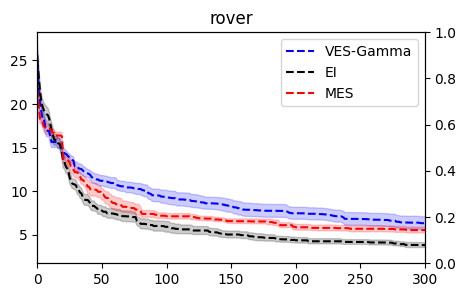

mopta08


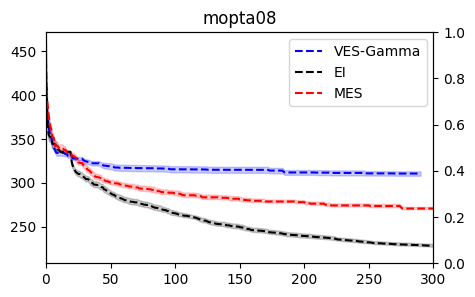

prior_sample_2d_ls0.5


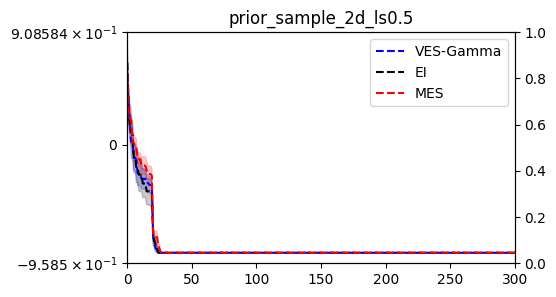

prior_sample_2d_ls1


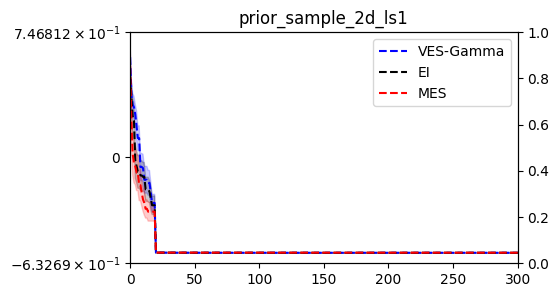

prior_sample_2d_ls2


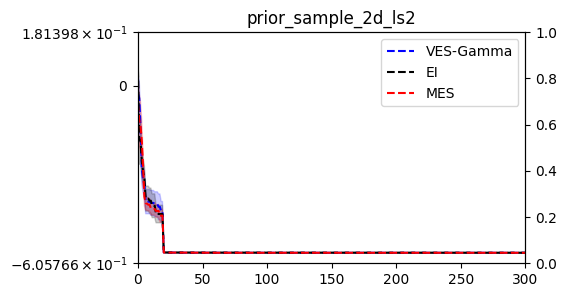

prior_sample_50d_ls0.5


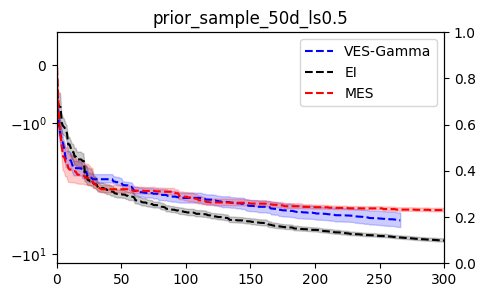

prior_sample_50d_ls1


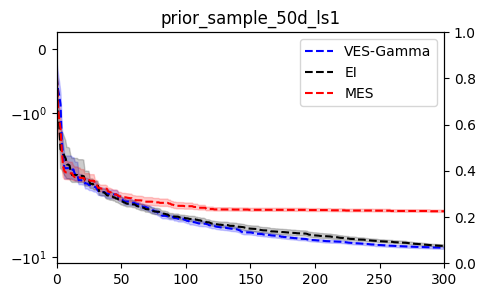

prior_sample_50d_ls2


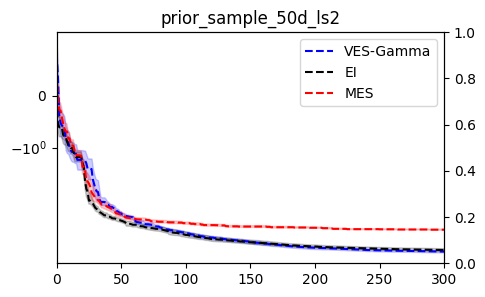

prior_sample_100d_ls0.5


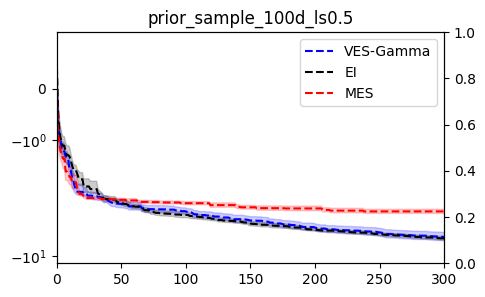

prior_sample_100d_ls1


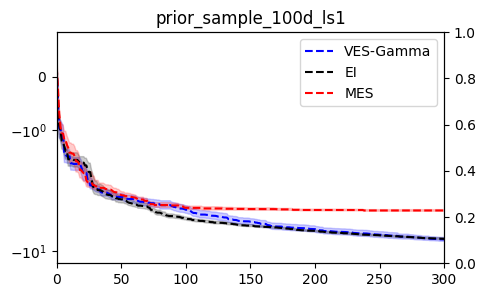

prior_sample_100d_ls2


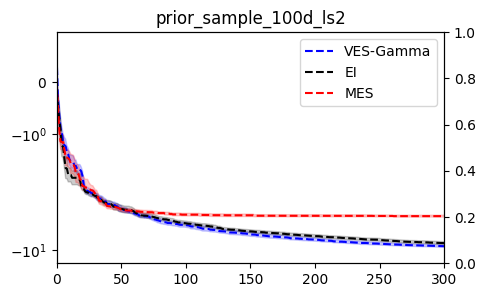

In [15]:
prior_benchmarks = ['prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2','prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2']
prior_benchmarks_new = ['prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']
benchmarks = ['branin2','hartmann6', 'rover', 'mopta08', 
              'prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2',
              'prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2', 
              'prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']

run_dirs_2 = glob.glob('results/ves_gamma_vs_ei2/*')
run_dirs_17 = glob.glob('results/ves_ablation_paths_sep_17/*')
run_dirs_25 = glob.glob('results/ves_100d_gp_prior_sep_25/*')

NUM_PATHS = 256

for benchmark in benchmarks:
    
    def general_dir_match(
            args: dict,
    ):
        if not 'prior_sample' in benchmark:
            return True
        else:
            ls = float(benchmark.split('_')[-1][2:])
            set_ls = args['set_lengthscale'] 
            return set_ls is None# and float(ls) == float(set_ls)
        
    if benchmark in prior_benchmarks_new:
        relevant_dirs = [d for d in run_dirs_25 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]

        # VES experiments are mssing, put it here temporarily
        
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        ves_dirs = [d for d in relevant_dirs if f'{d}/train_x_ves.npy' in glob.glob(f'{d}/*')]
        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        

    elif benchmark in prior_benchmarks:
        relevant_dirs_2 = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs_2 = [d for d in relevant_dirs_2 if general_dir_match(json.load(open(f'{d}/args.json')))]
        relevant_dirs_17 = [d for d in run_dirs_17 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs_17 = [d for d in relevant_dirs_17 if general_dir_match(json.load(open(f'{d}/args.json')))]

        mes_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ei_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs_17 if json.load(open(f'{d}/args.json'))['num_paths'] == NUM_PATHS]

    else:
        relevant_dirs = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs if json.load(open(f'{d}/args.json'))['num_paths'] == 128]
    
    # relevant_dirs_2 = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
    # relevant_dirs_2 = [d for d in relevant_dirs_2 if general_dir_match(json.load(open(f'{d}/args.json')))]
    # relevant_dirs_17 = [d for d in run_dirs_17 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
    # relevant_dirs_17 = [d for d in relevant_dirs_17 if general_dir_match(json.load(open(f'{d}/args.json')))]
    # relevant_dirs_25 = [d for d in run_dirs_25 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
    # relevant_dirs_25 = [d for d in relevant_dirs_25 if general_dir_match(json.load(open(f'{d}/args.json')))]

    # ei_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
    # mes_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
    # if benchmark in prior_benchmarks:
    #     ves_dirs = [d for d in relevant_dirs_17 if json.load(open(f'{d}/args.json'))['num_paths'] == NUM_PATHS]
    # else:
    #     ves_dirs = [d for d in relevant_dirs_2 if json.load(open(f'{d}/args.json'))['num_paths'] == 128]
    print(benchmark)
    fig, ax = plt.subplots(figsize=(5, 3))
    ax2 = ax.twinx()

    ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in ves_dirs]
    min_len = min([len(y) for y in ves_y])
    ves_y = [y[:min_len] for y in ves_y]
    ves_y = -np.stack(ves_y).squeeze(-1)
    ves_y_mean = ves_y.mean(axis=0)
    ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ei_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = -np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    
    mes_y = [np.maximum.accumulate(np.load(f'{d}/train_y_mes.npy')) for d in mes_dirs]
    min_len = min([len(y) for y in mes_y])
    mes_y = [y[:min_len] for y in mes_y]
    mes_y = -np.stack(mes_y).squeeze(-1)
    mes_y_mean = mes_y.mean(axis=0)
    mes_y_std = mes_y.std(axis=0)/ np.sqrt(len(mes_y))

    ax.plot(ves_y_mean, label='VES-Gamma', color='blue', linestyle='--')
    ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2, color='blue')
    
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    
    ax.plot(mes_y_mean, label='MES', color='red', linestyle='--')
    ax.fill_between(np.arange(len(mes_y_mean)), mes_y_mean-mes_y_std, mes_y_mean+mes_y_std, alpha=0.2, color='red')
    
    ax.legend()
    ax.set_title(f'{benchmark}')
    if benchmark == 'branin2':
        ax.set_yscale('log')
    if benchmark.startswith('prior_sample'):
        # find best value
        ax.set_yscale('symlog')
    ax.set_xlim(0, 300)
    # fig.savefig(f'figs/gp_prior/learn/{benchmark}.pdf', format='pdf', bbox_inches='tight', dpi=100)
    plt.show()
    
    

## Prior sample benchmarks, hyperparameters are set to the correct value

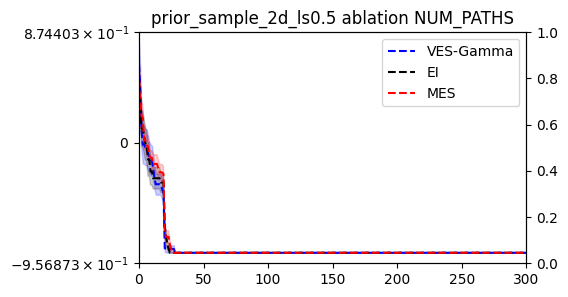

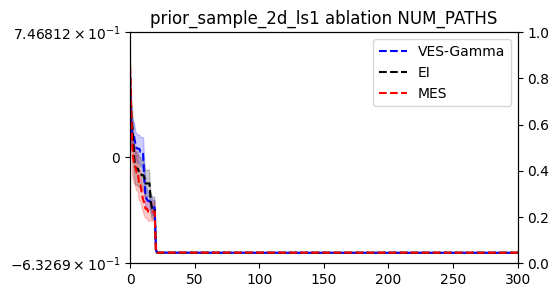

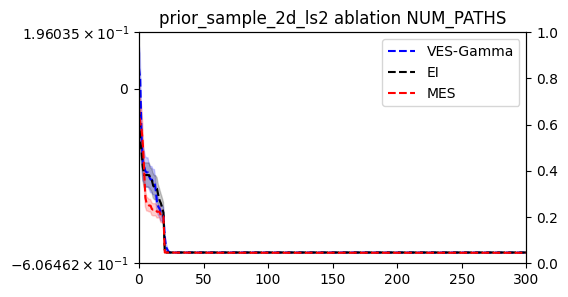

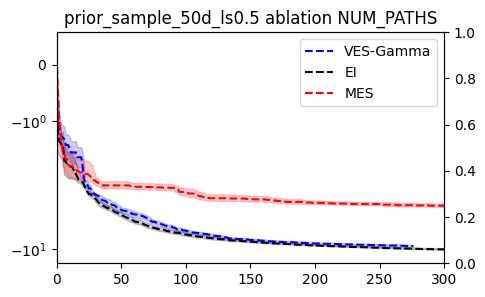

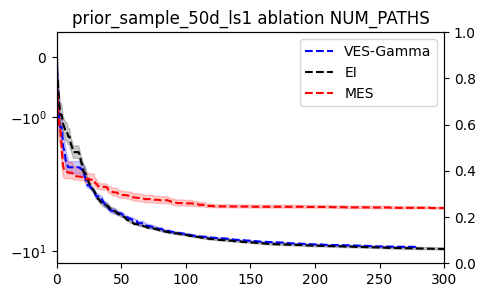

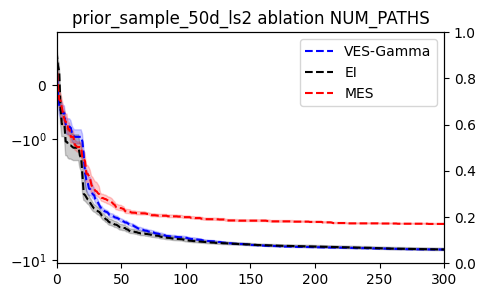

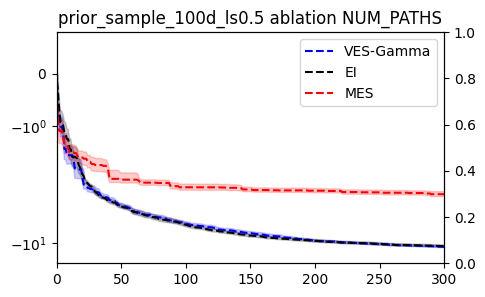

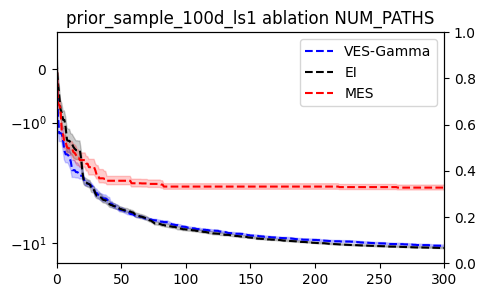

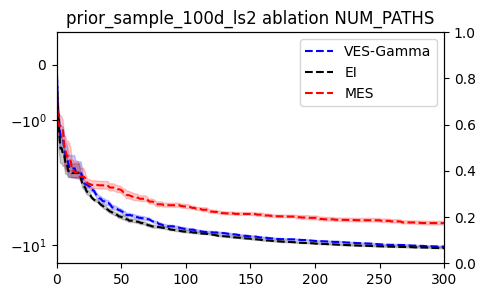

In [13]:
prior_benchmarks = ['prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2','prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2']
prior_benchmarks_new = ['prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']
benchmarks = ['prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2',
              'prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2', 
              'prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']

run_dirs_2 = glob.glob('results/ves_gamma_vs_ei2/*')
run_dirs_17 = glob.glob('results/ves_ablation_paths_sep_17/*')
run_dirs_25 = glob.glob('results/ves_100d_gp_prior_sep_25/*')

NUM_PATHS = 256

run_dirs_2 = glob.glob('results/ves_gamma_vs_ei2/*')
run_dirs_17 = glob.glob('results/ves_ablation_paths_sep_17/*')
run_dirs_25 = glob.glob('results/ves_100d_gp_prior_sep_25/*')

for benchmark in benchmarks:

    def general_dir_match(
            args: dict,
    ):
        if not 'prior_sample' in benchmark:
            return True
        else:
            ls = float(benchmark.split('_')[-1][2:])
            set_ls = args['set_lengthscale']
            return set_ls is not None and set_ls == ls

    if benchmark in prior_benchmarks_new:
        relevant_dirs = [d for d in run_dirs_25 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs if f'{d}/train_x_ves.npy' in glob.glob(f'{d}/*')]

    elif benchmark in prior_benchmarks:
        relevant_dirs_2 = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]

        # MES results with correct lengthscale are missing, put it here temporarily
        mes_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]

        relevant_dirs_2 = [d for d in relevant_dirs_2 if general_dir_match(json.load(open(f'{d}/args.json')))]
        relevant_dirs_17 = [d for d in run_dirs_17 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs_17 = [d for d in relevant_dirs_17 if general_dir_match(json.load(open(f'{d}/args.json')))]

        
        ei_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs_17 if json.load(open(f'{d}/args.json'))['num_paths'] == NUM_PATHS]

    else:
        relevant_dirs = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs if json.load(open(f'{d}/args.json'))['num_paths'] == 128]


    # ablation NUM_PATHS
    fig, ax = plt.subplots(figsize=(5, 3))
    ax2= ax.twinx()
 
    ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in ves_dirs]
    min_len = min([len(y) for y in ves_y])
    ves_y = [y[:min_len] for y in ves_y]
    ves_y = -np.stack(ves_y).squeeze(-1)
    ves_y_mean = ves_y.mean(axis=0)
    ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
    
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ei_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = -np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))

    mes_y = [np.maximum.accumulate(np.load(f'{d}/train_y_mes.npy')) for d in mes_dirs]
    min_len = min([len(y) for y in mes_y])
    mes_y = [y[:min_len] for y in mes_y]
    mes_y = -np.stack(mes_y).squeeze(-1)
    mes_y_mean = mes_y.mean(axis=0)
    mes_y_std = mes_y.std(axis=0)/ np.sqrt(len(mes_y))

    ax.plot(ves_y_mean, label='VES-Gamma', color='blue', linestyle='--')
    ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2, color='blue')

    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    
    ax.plot(mes_y_mean, label='MES', color='red', linestyle='--')
    ax.fill_between(np.arange(len(mes_y_mean)), mes_y_mean-mes_y_std, mes_y_mean+mes_y_std, alpha=0.2, color='red')
    
    ax.legend()
    ax.set_title(f'{benchmark} ablation NUM_PATHS')
    if benchmark == 'branin2':
        ax.set_yscale('log')
    if benchmark.startswith('prior_sample'):
        # find best value
        ax.set_yscale('symlog')
    ax.set_xlim(0, 300)
    # fig.savefig(f'figs/gp_prior/correct/{benchmark}.pdf', format='pdf', bbox_inches='tight', dpi=100)

    plt.show()
    
    

## Prior sample benchmarks, hyperparameters are set to two times the correct value

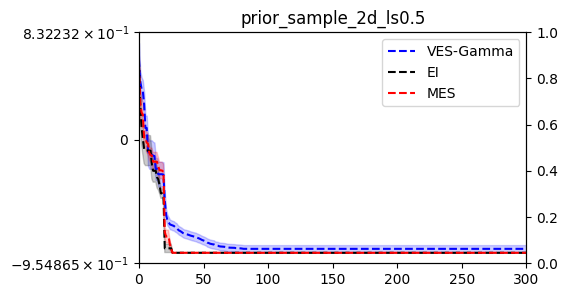

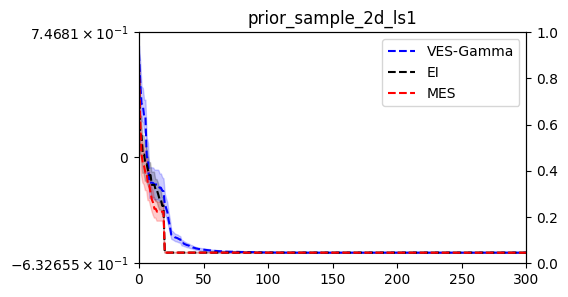

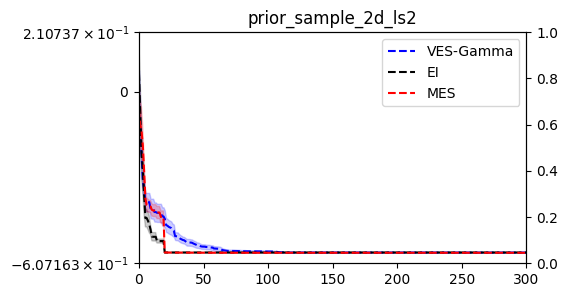

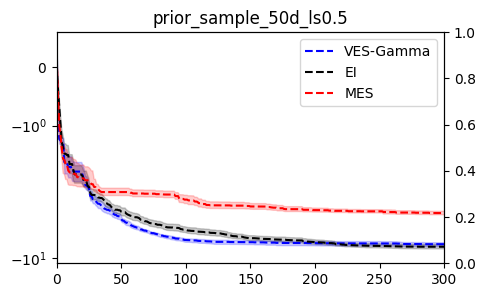

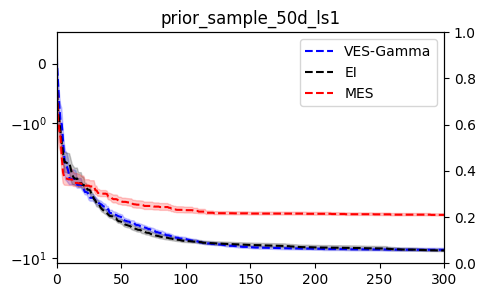

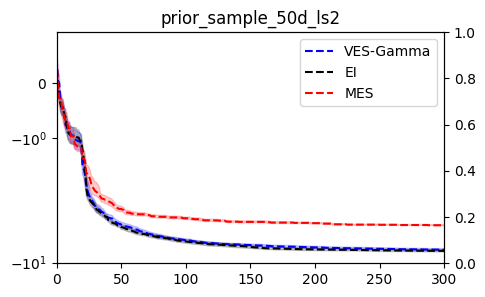

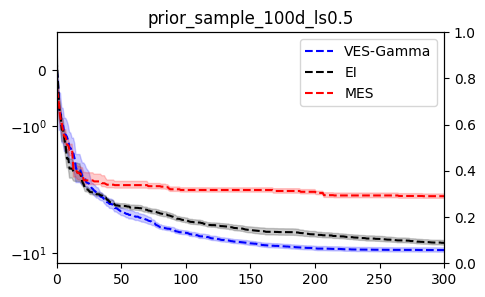

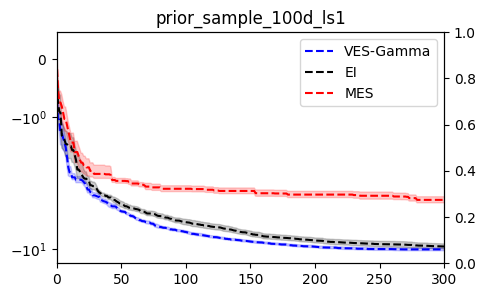

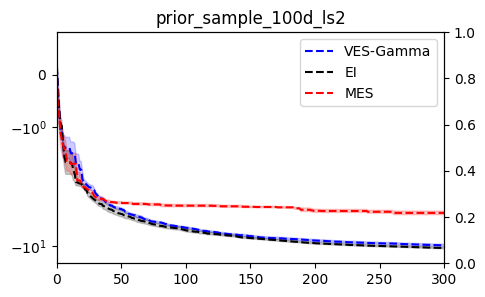

In [14]:
prior_benchmarks = ['prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2','prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2']
prior_benchmarks_new = ['prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']
benchmarks = ['prior_sample_2d_ls0.5', 'prior_sample_2d_ls1', 'prior_sample_2d_ls2',
              'prior_sample_50d_ls0.5', 'prior_sample_50d_ls1', 'prior_sample_50d_ls2', 
              'prior_sample_100d_ls0.5', 'prior_sample_100d_ls1', 'prior_sample_100d_ls2']

run_dirs_2 = glob.glob('results/ves_gamma_vs_ei2/*')
run_dirs_17 = glob.glob('results/ves_ablation_paths_sep_17/*')
run_dirs_25 = glob.glob('results/ves_100d_gp_prior_sep_25/*')

NUM_PATHS = 256

run_dirs_2 = glob.glob('results/ves_gamma_vs_ei2/*')
run_dirs_17 = glob.glob('results/ves_ablation_paths_sep_17/*')
run_dirs_25 = glob.glob('results/ves_100d_gp_prior_sep_25/*')

for benchmark in benchmarks:

    def general_dir_match(
            args: dict,
    ):
        if not 'prior_sample' in benchmark:
            return True
        else:
            ls = float(benchmark.split('_')[-1][2:])
            set_ls = args['set_lengthscale']
            return set_ls is not None and set_ls != ls

    if benchmark in prior_benchmarks_new:
        relevant_dirs = [d for d in run_dirs_25 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs if f'{d}/train_x_ves.npy' in glob.glob(f'{d}/*')]

    elif benchmark in prior_benchmarks:
        relevant_dirs_2 = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        # MES experiments are missing, so put it here temperarily
        mes_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        relevant_dirs_2 = [d for d in relevant_dirs_2 if general_dir_match(json.load(open(f'{d}/args.json')))]
        relevant_dirs_17 = [d for d in run_dirs_17 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs_17 = [d for d in relevant_dirs_17 if general_dir_match(json.load(open(f'{d}/args.json')))]

        ei_dirs = [d for d in relevant_dirs_2 if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        
        ves_dirs = [d for d in relevant_dirs_17 if json.load(open(f'{d}/args.json'))['num_paths'] == NUM_PATHS]

    else:
        relevant_dirs = [d for d in run_dirs_2 if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]
        relevant_dirs = [d for d in relevant_dirs if general_dir_match(json.load(open(f'{d}/args.json')))]

        ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
        mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
        ves_dirs = [d for d in relevant_dirs if json.load(open(f'{d}/args.json'))['num_paths'] == 128]

    fig, ax = plt.subplots(figsize=(5, 3))
    ax2 = ax.twinx()

    ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in ves_dirs]  
    min_len = min([len(y) for y in ves_y])
    ves_y = [y[:min_len] for y in ves_y]
    ves_y = -np.stack(ves_y).squeeze(-1)
    ves_y_mean = ves_y.mean(axis=0)
    ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))

    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ei_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = -np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))

    mes_y = [np.maximum.accumulate(np.load(f'{d}/train_y_mes.npy')) for d in mes_dirs]
    min_len = min([len(y) for y in mes_y])
    mes_y = [y[:min_len] for y in mes_y]
    mes_y = -np.stack(mes_y).squeeze(-1)
    mes_y_mean = mes_y.mean(axis=0)
    mes_y_std = mes_y.std(axis=0)/ np.sqrt(len(mes_y))

    ax.plot(ves_y_mean, label='VES-Gamma', color='blue', linestyle='--')
    ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2, color='blue')

    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    
    ax.plot(mes_y_mean, label='MES', color='red', linestyle='--')
    ax.fill_between(np.arange(len(mes_y_mean)), mes_y_mean-mes_y_std, mes_y_mean+mes_y_std, alpha=0.2, color='red')
    ax.legend()
    ax.set_title(f'{benchmark}')
    if benchmark == 'branin2':
        ax.set_yscale('log')
    if benchmark.startswith('prior_sample'):
        # find best value
        ax.set_yscale('symlog')
    ax.set_xlim(0, 300)
    # fig.savefig(f'figs/gp_prior/twoCorrect/{benchmark}.pdf', format='pdf', bbox_inches='tight', dpi=100)

    plt.show()
    
    